In [3]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt

## загрузка данных

In [4]:
wine_quality = fetch_ucirepo(id=186) 
heart_disease = fetch_ucirepo(id=45)

In [5]:
wine = pd.concat([wine_quality.data.features, wine_quality.data.targets], sort = False, axis = 1)
heart = pd.concat([heart_disease.data.features, heart_disease.data.targets], sort = False, axis = 1)

In [6]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


## обработка

In [9]:
wine = wine.dropna()

In [10]:
heart = heart.dropna()

только числовые признаки

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [12]:
X_wine = wine.drop(['quality'], axis = 1)
y_wine = wine['quality']

X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)

In [13]:
X_heart = heart.drop(['num'], axis = 1)
y_heart = heart['num']

X_heart_train, X_heart_test, y_heart_train, y_heart_test = train_test_split(X_heart, y_heart, test_size=0.2, random_state=42)

In [16]:
scaler_wine_train = preprocessing.StandardScaler().fit(X_wine_train)
scaler_wine_test = preprocessing.StandardScaler().fit(X_wine_test)

scaler_heart_train = preprocessing.StandardScaler().fit(X_heart_train)
scaler_heart_test = preprocessing.StandardScaler().fit(X_heart_test)

In [17]:
X_wine_train_scaled = pd.DataFrame(scaler_wine_train.transform(X_wine_train))
X_wine_test_scaled = pd.DataFrame(scaler_wine_train.transform(X_wine_test))

X_heart_train_scaled = pd.DataFrame(scaler_heart_train.transform(X_heart_train))
X_heart_test_scaled = pd.DataFrame(scaler_heart_train.transform(X_heart_test))

## обучаем

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [20]:
clf_wine = LogisticRegression(random_state=0).fit(X_wine_train_scaled, y_wine_train)
y_pred_wine_LogisticRegression_scaled = clf_wine.predict(X_wine_test)
y_pred_wine_LogisticRegression_scaled

/home/filichkin/.local/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([4, 4, 4, ..., 4, 4, 4])

In [21]:
print(f1_score(y_pred_wine_LogisticRegression_scaled, y_wine_test, average = 'weighted'))
print(f1_score(y_pred_wine_LogisticRegression_scaled, y_wine_test, average = 'micro'))
print(f1_score(y_pred_wine_LogisticRegression_scaled, y_wine_test, average = 'macro'))

0.034508899324557744
0.026923076923076925
0.03246008877087595


In [22]:
clf_wine_LogisticRegression = LogisticRegression(random_state=0).fit(X_wine_train, y_wine_train)
y_pred_wine_LogisticRegression = clf_wine_LogisticRegression.predict(X_wine_test)
y_pred_wine_LogisticRegression

/home/filichkin/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([6, 5, 6, ..., 6, 5, 5])

In [23]:
print("F1-measure, weighted: ", f1_score(y_pred_wine_LogisticRegression, y_wine_test, average = 'weighted'))
print("F1-measure, micro: ", f1_score(y_pred_wine_LogisticRegression, y_wine_test, average = 'micro'))
print("F1-measure, macro: ", f1_score(y_pred_wine_LogisticRegression, y_wine_test, average = 'macro'))

F1-measure, weighted:  0.5404948188130868
F1-measure, micro:  0.47692307692307695
F1-measure, macro:  0.19182446018966498


не масштабируем

In [25]:
clf_heart_LogisticRegression = LogisticRegression(random_state=0).fit(X_heart_train, y_heart_train)
y_pred_heart_LogisticRegression = clf_heart_LogisticRegression.predict(X_heart_test)
y_pred_heart_LogisticRegression

/home/filichkin/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 3, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 3, 0, 0, 2, 3, 0,
       0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 3])

In [26]:
print("F1-measure, weighted: ", f1_score(y_pred_heart_LogisticRegression, y_heart_test, average = 'weighted'))
print("F1-measure, micro: ", f1_score(y_pred_heart_LogisticRegression, y_heart_test, average = 'micro'))
print("F1-measure, macro: ", f1_score(y_pred_heart_LogisticRegression, y_heart_test, average = 'macro'))

F1-measure, weighted:  0.7141203703703703
F1-measure, micro:  0.6666666666666666
F1-measure, macro:  0.32777777777777783


In [27]:
from sklearn import svm

In [28]:
clf_wine_SVM = svm.SVC()
clf_wine_SVM.fit(X_wine_train, y_wine_train)

SVC()

In [29]:
y_wine_pred_SVM = clf_wine_SVM.predict(X_wine_test)

In [30]:
print("F1-measure, weighted: ", f1_score(y_wine_pred_SVM, y_wine_test, average = 'weighted'))
print("F1-measure, micro: ", f1_score(y_wine_pred_SVM, y_wine_test, average = 'micro'))
print("F1-measure, mcaro: ", f1_score(y_wine_pred_SVM, y_wine_test, average = 'macro'))

F1-measure, weighted:  0.554140106373397
F1-measure, micro:  0.45076923076923076
F1-measure, mcaro:  0.11865486944506316


In [31]:
clf_heart_SVM = svm.SVC()
clf_heart_SVM.fit(X_heart_train, y_heart_train)

SVC()

In [32]:
y_heart_pred_SVM = clf_heart_SVM.predict(X_heart_test)

In [33]:
print("F1-measure, weighted: ", f1_score(y_heart_pred_SVM, y_heart_test, average = 'weighted'))
print("F1-measure, micro: ", f1_score(y_heart_pred_SVM, y_heart_test, average = 'micro'))
print("F1-measure, macro: ", f1_score(y_heart_pred_SVM, y_heart_test, average = 'macro'))

F1-measure, weighted:  0.75
F1-measure, micro:  0.6
F1-measure, macro:  0.15


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [35]:
clf_wine_RandomForest = RandomForestClassifier(max_depth=2, random_state=0)
clf_wine_RandomForest.fit(X_wine_train, y_wine_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [36]:
y_wine_pred_RandomForest = clf_wine_RandomForest.predict(X_wine_test)

In [37]:
print("F1-measure, weighted: ", f1_score(y_wine_pred_RandomForest, y_wine_test, average = 'weighted'))
print("F1-measure, micro: ", f1_score(y_wine_pred_RandomForest, y_wine_test, average = 'micro'))
print("F1-measire, macro: ", f1_score(y_wine_pred_RandomForest, y_wine_test, average = 'macro'))

F1-measure, weighted:  0.5903620363036599
F1-measure, micro:  0.5215384615384615
F1-measire, macro:  0.16783021920520305


In [38]:
clf_heart_RandomForest = RandomForestClassifier(max_depth=2, random_state=0)
clf_heart_RandomForest.fit(X_heart_train, y_heart_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [39]:
y_heart_pred_RandomForest = clf_heart_RandomForest.predict(X_heart_test)

In [40]:
print("F1-measure, weighted: ", f1_score(y_heart_pred_RandomForest, y_heart_test, average = 'weighted'))
print("F1-measure, micro: ", f1_score(y_heart_pred_RandomForest, y_heart_test, average = 'micro'))
print("F1-measure, macro: ", f1_score(y_heart_pred_RandomForest, y_heart_test, average = 'macro'))

F1-measure, weighted:  0.7546772068511199
F1-measure, micro:  0.6333333333333333
F1-measure, macro:  0.22924901185770752


In [41]:
from sklearn.ensemble import GradientBoostingClassifier

In [42]:
clf_wine_GradientBoosting = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_wine_train, y_wine_train)

In [43]:
print("Score: ", clf_wine_GradientBoosting.score(X_wine_test, y_wine_test))

Score:  0.5384615384615384


In [44]:
clf_heart_GradientBoosting = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_heart_train, y_heart_train)

In [45]:
print("Score: ", clf_heart_GradientBoosting.score(X_heart_test, y_heart_test))

Score:  0.55


In [46]:
from sklearn.naive_bayes import GaussianNB

In [47]:
gnb_wine_NaiveBayes = GaussianNB()

In [48]:
gnb_wine_NaiveBayes.fit(X_wine_train, y_wine_train)

GaussianNB()

In [49]:
y_wine_pred_NaiveBayes = gnb_wine_NaiveBayes.predict(X_wine_test)

In [50]:
print("F1-measure, weighted: ", f1_score(y_wine_pred_NaiveBayes, y_wine_test, average = 'weighted'))
print("F1-measure, micro: ", f1_score(y_wine_pred_NaiveBayes, y_wine_test, average = 'micro'))
print("F1-measure, macro: ", f1_score(y_wine_pred_NaiveBayes, y_wine_test, average = 'macro'))

F1-measure, weighted:  0.4720349833427533
F1-measure, micro:  0.46923076923076923
F1-measure, macro:  0.2534878650920239


In [51]:
gnb_heart_NaiveBayes = GaussianNB()

In [52]:
gnb_heart_NaiveBayes.fit(X_heart_train, y_heart_train)

GaussianNB()

In [53]:
y_heart_pred_NaiveBayes = gnb_heart_NaiveBayes.predict(X_heart_test)

In [54]:
print("F1-measure, weighted: ", f1_score(y_heart_pred_NaiveBayes, y_heart_test, average = 'weighted'))
print("F1-measure, micro: ", f1_score(y_heart_pred_NaiveBayes, y_heart_test, average = 'micro'))
print("F1-measure, macro: ", f1_score(y_heart_pred_NaiveBayes, y_heart_test, average = 'macro'))

F1-measure, weighted:  0.5814285714285714
F1-measure, micro:  0.5833333333333334
F1-measure, macro:  0.24952380952380954


In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
N_wine = len(set(wine['quality']))

In [57]:
neigh_wine_KNN = KNeighborsClassifier(n_neighbors=N_wine)

In [58]:
neigh_wine_KNN.fit(X_wine_train, y_wine_train)

KNeighborsClassifier(n_neighbors=7)

In [59]:
y_wine_pred_KNN = neigh_wine_KNN.predict(X_wine_test)

In [60]:
print("F1-measure, weighted: ", f1_score(y_wine_pred_KNN, y_wine_test, average = 'weighted'))
print("F1-measure, micro: ", f1_score(y_wine_pred_KNN, y_wine_test, average = 'micro'))
print("F1-measure, macro: ", f1_score(y_wine_pred_KNN, y_wine_test, average = 'macro'))

F1-measure, weighted:  0.4827776064259576
F1-measure, micro:  0.46615384615384614
F1-measure, macro:  0.2074473674059815


In [61]:
N_heart = len(set(heart['num']))

In [62]:
neigh_heart_KNN = KNeighborsClassifier(n_neighbors=N_heart)

In [63]:
neigh_heart_KNN.fit(X_heart_train, y_heart_train)

KNeighborsClassifier()

In [64]:
y_heart_pred_KNN = neigh_heart_KNN.predict(X_heart_test)

In [65]:
print("F1-measure, weighted: ", f1_score(y_heart_pred_KNN, y_heart_test, average = 'weighted'))
print("F1-measure, micro: ", f1_score(y_heart_pred_KNN, y_heart_test, average = 'micro'))
print("F1-measure, macro: ", f1_score(y_heart_pred_KNN, y_heart_test, average = 'macro'))

F1-measure, weighted:  0.5714285714285714
F1-measure, micro:  0.5
F1-measure, macro:  0.14285714285714285


Лучшие метрики для wine:

F1-weighted: 0.5903 (RandomForest)

F1-micro: 0.5215 (RandomForest)

F1-macro: 0.1678 (RandomForest)

Лучшие метрики для heart:

F1-weighted: 0.7546 (RandomForest)

F1-micro: 0.6333 (RandomForest)

F1-macro: 0.2292 (RandomForest)

## уменьшаем размерность

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [68]:
pca = PCA(n_components = 2)
X_train_pca_wine = pca.fit_transform(X_wine_train)

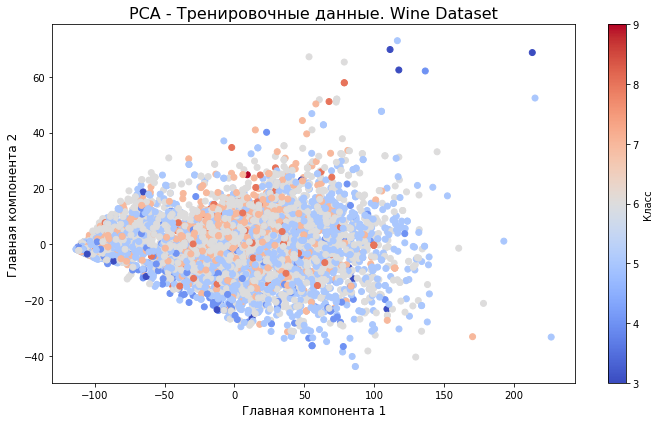

In [69]:
plt.figure(figsize = (10, 6))
plt.scatter(X_train_pca_wine[:, 0], X_train_pca_wine[:, 1], c = y_wine_train, cmap = "coolwarm")
plt.title("PCA - Тренировочные данные. Wine Dataset", fontsize = 16)
plt.xlabel("Главная компонента 1", fontsize = 12)
plt.ylabel("Главная компонента 2", fontsize = 12)
plt.colorbar(label = "Класс")
plt.tight_layout()
plt.show()

In [70]:
pca = PCA(n_components = 2)
X_train_pca_heart = pca.fit_transform(X_heart_train)

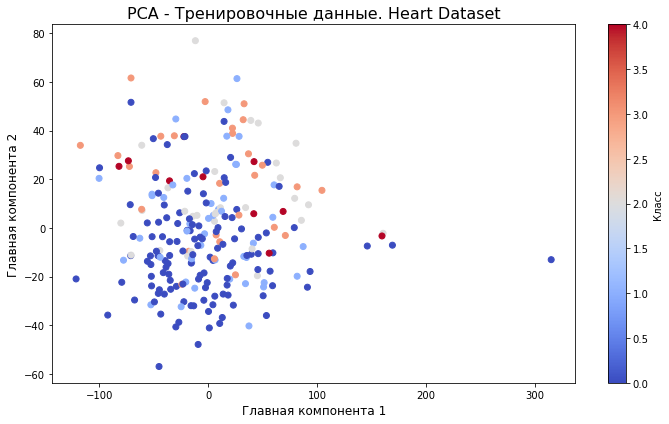

In [71]:
plt.figure(figsize = (10, 6))
plt.scatter(X_train_pca_heart[:, 0], X_train_pca_heart[:, 1], c = y_heart_train, cmap = "coolwarm")
plt.title("PCA - Тренировочные данные. Heart Dataset", fontsize = 16)
plt.xlabel("Главная компонента 1", fontsize = 12)
plt.ylabel("Главная компонента 2", fontsize = 12)
plt.colorbar(label = "Класс")
plt.tight_layout()
plt.show()

In [72]:
tsne_wine = TSNE(n_components = 2)
X_train_tsne_wine = tsne_wine.fit_transform(X_wine_train)

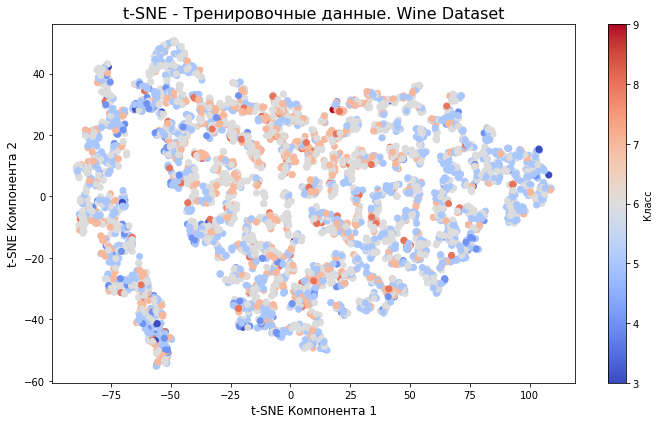

In [73]:
plt.figure(figsize = (10, 6))
plt.scatter(X_train_tsne_wine[:, 0], X_train_tsne_wine[:, 1], c = y_wine_train, cmap = "coolwarm")
plt.title("t-SNE - Тренировочные данные. Wine Dataset", fontsize = 16)
plt.xlabel("t-SNE Компонента 1", fontsize = 12)
plt.ylabel("t-SNE Компонента 2", fontsize = 12)
plt.colorbar(label = "Класс")
plt.tight_layout()
plt.show()

In [74]:
tsne_heart = TSNE(n_components = 2)
X_train_tsne_heart = tsne_wine.fit_transform(X_heart_train)

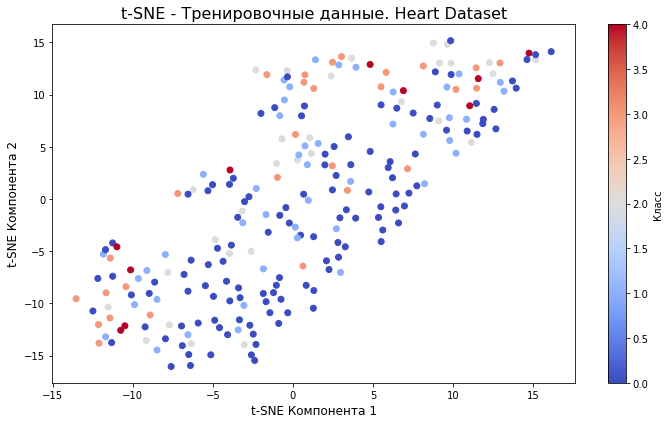

In [75]:
plt.figure(figsize = (10, 6))
plt.scatter(X_train_tsne_heart[:, 0], X_train_tsne_heart[:, 1], c = y_heart_train, cmap = "coolwarm")
plt.title("t-SNE - Тренировочные данные. Heart Dataset", fontsize = 16)
plt.xlabel("t-SNE Компонента 1", fontsize = 12)
plt.ylabel("t-SNE Компонента 2", fontsize = 12)
plt.colorbar(label = "Класс")
plt.tight_layout()
plt.show()

In [76]:
lda_wine = LinearDiscriminantAnalysis(n_components = 1)
X_train_lda_wine = lda_wine.fit_transform(X_wine_train, y_wine_train)

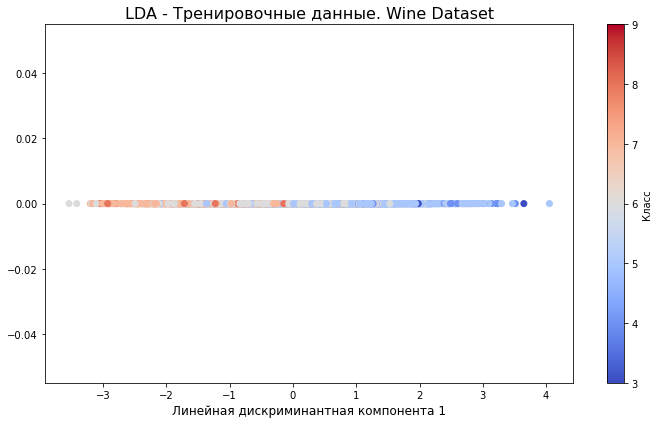

In [77]:
plt.figure(figsize = (10, 6))
plt.scatter(X_train_lda_wine[:, 0], np.zeros_like(X_train_lda_wine[:, 0]), c = y_wine_train, cmap = "coolwarm")
plt.title("LDA - Тренировочные данные. Wine Dataset", fontsize = 16)
plt.xlabel("Линейная дискриминантная компонента 1", fontsize = 12)
plt.colorbar(label = "Класс")
plt.tight_layout()
plt.show()

In [78]:
lda_heart = LinearDiscriminantAnalysis(n_components = 1)
X_train_lda_heart = lda_heart.fit_transform(X_heart_train, y_heart_train)

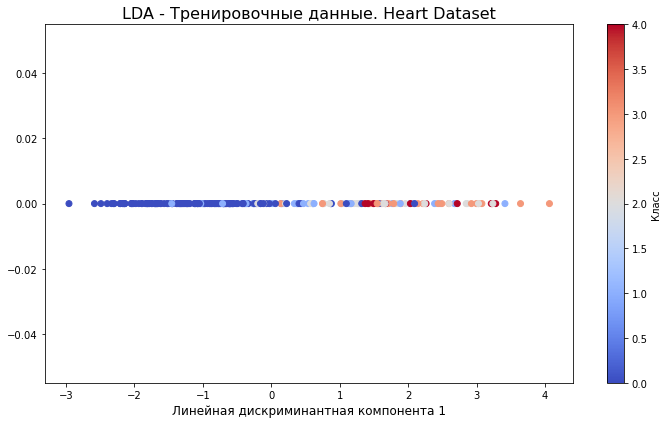

In [79]:
plt.figure(figsize = (10, 6))
plt.scatter(X_train_lda_heart[:, 0], np.zeros_like(X_train_lda_heart[:, 0]), c = y_heart_train, cmap = "coolwarm")
plt.title("LDA - Тренировочные данные. Heart Dataset", fontsize = 16)
plt.xlabel("Линейная дискриминантная компонента 1", fontsize = 12)
plt.colorbar(label = "Класс")
plt.tight_layout()
plt.show()

## Bootstrap

In [81]:
from sklearn.utils import resample
from tqdm import tqdm

import warnings
for warn in [UserWarning, FutureWarning]: warnings.filterwarnings("ignore", category = warn)

In [82]:
def bootstrap_evaluation(model, X_train, y_train, X_test, y_test, n_iterations = 10):
    scores = []
    for _ in tqdm(range(n_iterations)):
        X_resampled, y_resampled = resample(X_train, y_train, random_state = 42, n_samples = int(0.05*len(X_train)))
        model.fit(X_resampled, y_resampled)
        score = model.score(X_test, y_test)
        scores.append(score)
    return np.mean(scores), np.std(scores)

In [83]:
res_wine = []
models_wine = [clf_wine_LogisticRegression, clf_wine_SVM, clf_wine_RandomForest, clf_wine_GradientBoosting,
              gnb_wine_NaiveBayes, neigh_wine_KNN]
for model in models_wine:
    arr = []
    for k in ([5, 25, 50]): #Взял поменьше, так как иначе работает очень долго
        arr.append(["k = ", k, bootstrap_evaluation(model, X_wine_train, y_wine_train, X_wine_test, y_wine_test, n_iterations = k)])
    res_wine.append([model, arr])

100%|███████████████████████████████████████████| 50/50 [00:02<00:00, 23.74it/s]


In [84]:
res_wine

[[LogisticRegression(random_state=0),
  [['k = ', 5, (0.4699999999999999, 5.551115123125783e-17)],
   ['k = ', 25, (0.47, 0.0)],
   ['k = ', 50, (0.46999999999999986, 1.1102230246251565e-16)]]],
 [SVC(),
  [['k = ', 5, (0.4438461538461539, 5.551115123125783e-17)],
   ['k = ', 25, (0.4438461538461539, 5.551115123125783e-17)],
   ['k = ', 50, (0.4438461538461538, 5.551115123125783e-17)]]],
 [RandomForestClassifier(max_depth=2, random_state=0),
  [['k = ', 5, (0.5323076923076923, 0.0)],
   ['k = ', 25, (0.5323076923076921, 1.1102230246251565e-16)],
   ['k = ', 50, (0.5323076923076924, 1.1102230246251565e-16)]]],
 [GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0),
  [['k = ', 5, (0.47384615384615386, 0.0)],
   ['k = ', 25, (0.47384615384615386, 0.0)],
   ['k = ', 50, (0.47384615384615386, 0.0)]]],
 [GaussianNB(),
  [['k = ', 5, (0.41923076923076924, 0.0)],
   ['k = ', 25, (0.4192307692307692, 5.551115123125783e-17)],
   ['k = ', 50, (0.4192307692307692, 5.55111512

In [85]:
res_heart = []
models_heart = [clf_heart_LogisticRegression, clf_heart_SVM, clf_heart_RandomForest, clf_heart_GradientBoosting,
              gnb_heart_NaiveBayes, neigh_heart_KNN]
for model in models_heart:
    arr = []
    for k in ([5, 25, 50]): #Взял поменьше, так как иначе работает очень долго
        arr.append(["k = ", k, bootstrap_evaluation(model, X_heart_train, y_heart_train, X_heart_test, y_heart_test, n_iterations = k)])
    res_heart.append([model, arr])

100%|██████████████████████████████████████████| 50/50 [00:00<00:00, 172.89it/s]


In [86]:
res_heart

[[LogisticRegression(random_state=0),
  [['k = ', 5, (0.3, 0.0)],
   ['k = ', 25, (0.3, 0.0)],
   ['k = ', 50, (0.30000000000000004, 5.551115123125783e-17)]]],
 [SVC(),
  [['k = ', 5, (0.15, 0.0)],
   ['k = ', 25, (0.15, 0.0)],
   ['k = ', 50, (0.15000000000000002, 2.7755575615628914e-17)]]],
 [RandomForestClassifier(max_depth=2, random_state=0),
  [['k = ', 5, (0.4333333333333334, 5.551115123125783e-17)],
   ['k = ', 25, (0.43333333333333335, 0.0)],
   ['k = ', 50, (0.4333333333333334, 5.551115123125783e-17)]]],
 [GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0),
  [['k = ', 5, (0.36666666666666664, 0.0)],
   ['k = ', 25, (0.36666666666666664, 0.0)],
   ['k = ', 50, (0.36666666666666664, 0.0)]]],
 [GaussianNB(),
  [['k = ', 5, (0.16666666666666666, 0.0)],
   ['k = ', 25, (0.16666666666666669, 2.7755575615628914e-17)],
   ['k = ', 50, (0.16666666666666663, 2.7755575615628914e-17)]]],
 [KNeighborsClassifier(),
  [['k = ', 5, (0.23333333333333334, 0.0)],
   ['k 

## Random Search

In [87]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform

In [88]:
def random_search_evaluation(model, X_train, y_train):
    if isinstance(model, SVC):
        param_dist = {
            "C": uniform(0.1, 10), # Случайные значения для C
            "gamma": uniform(0.001, 0.1), # Случайные значения для gamma
            "kernel": ["linear", "poly", "rbf"] # Случайный выбор ядер
        }
        print('1')
        random_search = RandomizedSearchCV(model, param_distributions = param_dist, n_iter = 2, random_state = 42, n_jobs = -1, cv = None)
        print('2')
        random_search.fit(X_train, y_train)
        print('3')
        return random_search.best_params_, random_search.best_score_
    else:
        return None, None

In [ ]:
random_search_evaluation(svm.SVC(), X_wine_train, y_wine_train)

In [ ]:
random_search_evaluation(svm.SVC(), X_heart_train, y_heart_train)

долго работает

## Отчёт

In [90]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [91]:
results = {}

In [92]:
models = [
    ("Логистическая регрессия", LogisticRegression(max_iter = 100)),
    ("SVM", SVC()),
    ("Случайный лес", RandomForestClassifier()),
    ("Градиентный бустинг", GradientBoostingClassifier()),
    ("Наивный байес", GaussianNB()),
    ("KNN", KNeighborsClassifier())
]

In [93]:
for model_name, model in models:
    model.fit(X_wine_train, y_wine_train)
    y_pred = model.predict(X_wine_test)
    results[model_name] = {
        "Classification Report": classification_report(y_wine_test, y_pred, output_dict=True),
        "Bootstrap Mean Accuracy": None,
        "Bootstrap Std Accuracy": None,
        "Random Search Best Params": None,
        "Random Search Best Score": None
    }
    
    mean_score, std_score = bootstrap_evaluation(model, X_wine_train, y_wine_train, X_wine_test, y_wine_test)
    results[model_name]["Bootstrap Mean Accuracy"] = mean_score
    results[model_name]["Bootstrap Std Accuracy"] = std_score

100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 24.09it/s]


In [94]:
for model_name, report in results.items():
    print(f"Модель: {model_name}")
    
    # Вывод classification_report в виде таблицы
    print("Метрики классификации для каждой категории:")
    classification_df = pd.DataFrame(report["Classification Report"]).transpose()
    print(classification_df)
    
    # Добавление информации о бутстрэппинге
    print(f"\nСредняя точность бутстрэппинга: {report['Bootstrap Mean Accuracy']:.4f}")
    print(f"Стандартное отклонение бутстрэппинга: {report['Bootstrap Std Accuracy']:.4f}")
    
    # Проверка и вывод результатов случайного поиска
    if report["Random Search Best Params"] is not None:
        print(f"Лучшие параметры случайного поиска: {report['Random Search Best Params']}")
    else:
        print("Лучшие параметры случайного поиска: Не применялся")
    
    if report["Random Search Best Score"] is not None:
        print(f"Лучший результат случайного поиска: {report['Random Search Best Score']:.4f}")
    else:
        print("Лучший результат случайного поиска: Не применялся")
    
    # Разделитель для читаемости
    print("\n" + "="*50 + "\n")

Модель: Логистическая регрессия
Метрики классификации для каждой категории:
              precision    recall  f1-score      support
3              1.000000  0.166667  0.285714     6.000000
4              0.000000  0.000000  0.000000    43.000000
5              0.460808  0.482587  0.471446   402.000000
6              0.485126  0.710218  0.576479   597.000000
7              0.250000  0.004651  0.009132   215.000000
8              0.000000  0.000000  0.000000    36.000000
9              0.000000  0.000000  0.000000     1.000000
accuracy       0.476923  0.476923  0.476923     0.476923
macro avg      0.313705  0.194875  0.191824  1300.000000
weighted avg   0.411242  0.476923  0.413351  1300.000000

Средняя точность бутстрэппинга: 0.4700
Стандартное отклонение бутстрэппинга: 0.0000
Лучшие параметры случайного поиска: Не применялся
Лучший результат случайного поиска: Не применялся


Модель: SVM
Метрики классификации для каждой категории:
              precision    recall  f1-score      suppo

In [95]:
summary_results = []

for model_name, report in results.items():
    summary_results.append({
        "Модель": model_name,
        "Средняя точность бутстрэппинга": report["Bootstrap Mean Accuracy"],
        "Стандартное отклонение бутстрэппинга": report["Bootstrap Std Accuracy"],
        "Лучший результат случайного поиска": report["Random Search Best Score"] if report["Random Search Best Score"] is not None else "Не применялся",
        "Лучшие параметры случайного поиска": str(report["Random Search Best Params"]) if report["Random Search Best Params"] is not None else "Не применялись"
    })

In [96]:
summary_df = pd.DataFrame(summary_results)

print("Сводка результатов:\n")

best_model_idx = summary_df["Лучший результат случайного поиска"].apply(lambda x: isinstance(x, (int, float))).idxmax()
best_model = summary_df.loc[best_model_idx]

print("\nРезультаты лучшей модели:")
print(f"Модель: {best_model['Модель']}")
print(f"Средняя точность бутстрэппинга: {best_model['Средняя точность бутстрэппинга']:.6f}")
print(f"Стандартное отклонение бутстрэппинга: {best_model['Стандартное отклонение бутстрэппинга']:.6f}")
print(f"Лучший результат случайного поиска: {best_model['Лучший результат случайного поиска']}")
print(f"Лучшие параметры случайного поиска: {best_model['Лучшие параметры случайного поиска']}")

summary_df

Сводка результатов:


Результаты лучшей модели:
Модель: Логистическая регрессия
Средняя точность бутстрэппинга: 0.470000
Стандартное отклонение бутстрэппинга: 0.000000
Лучший результат случайного поиска: Не применялся
Лучшие параметры случайного поиска: Не применялись


,Модель,Средняя точность бутстрэппинга,Стандартное отклонение бутстрэппинга,Лучший результат случайного поиска,Лучшие параметры случайного поиска
0,Логистическая регрессия,0.470000,5.551115e-17,Не применялся,Не применялись
1,SVM,0.443846,5.551115e-17,Не применялся,Не применялись
2,Случайный лес,0.538000,6.155769e-03,Не применялся,Не применялись
3,Градиентный бустинг,0.473692,2.615385e-03,Не применялся,Не применялись
4,Наивный байес,0.419231,0.000000e+00,Не применялся,Не применялись
5,KNN,0.363846,0.000000e+00,Не применялся,Не применялись


Понижение размерности

In [97]:
for model_name, model in models:
    model.fit(X_train_tsne_wine, y_wine_train)
    X_tsne_wine_test = tsne_wine.fit_transform(X_wine_test)
    y_pred = model.predict(X_tsne_wine_test)
    results[model_name] = {
        "Classification Report": classification_report(y_wine_test, y_pred, output_dict=True),
        "Bootstrap Mean Accuracy": None,
        "Bootstrap Std Accuracy": None,
        "Random Search Best Params": None,
        "Random Search Best Score": None
    }
    
    mean_score, std_score = bootstrap_evaluation(model, X_train_tsne_wine, y_wine_train, X_tsne_wine_test, y_wine_test)
    results[model_name]["Bootstrap Mean Accuracy"] = mean_score
    results[model_name]["Bootstrap Std Accuracy"] = std_score

100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 24.21it/s]


In [98]:
for model_name, report in results.items():
    print(f"Модель: {model_name}")
    
    # Вывод classification_report в виде таблицы
    print("Метрики классификации для каждой категории:")
    classification_df = pd.DataFrame(report["Classification Report"]).transpose()
    print(classification_df)
    
    # Добавление информации о бутстрэппинге
    print(f"\nСредняя точность бутстрэппинга: {report['Bootstrap Mean Accuracy']:.4f}")
    print(f"Стандартное отклонение бутстрэппинга: {report['Bootstrap Std Accuracy']:.4f}")
    
    # Проверка и вывод результатов случайного поиска
    if report["Random Search Best Params"] is not None:
        print(f"Лучшие параметры случайного поиска: {report['Random Search Best Params']}")
    else:
        print("Лучшие параметры случайного поиска: Не применялся")
    
    if report["Random Search Best Score"] is not None:
        print(f"Лучший результат случайного поиска: {report['Random Search Best Score']:.4f}")
    else:
        print("Лучший результат случайного поиска: Не применялся")
    
    # Разделитель для читаемости
    print("\n" + "="*50 + "\n")

Модель: Логистическая регрессия
Метрики классификации для каждой категории:
              precision    recall  f1-score      support
3              0.000000  0.000000  0.000000     6.000000
4              0.000000  0.000000  0.000000    43.000000
5              0.000000  0.000000  0.000000   402.000000
6              0.459231  1.000000  0.629415   597.000000
7              0.000000  0.000000  0.000000   215.000000
8              0.000000  0.000000  0.000000    36.000000
9              0.000000  0.000000  0.000000     1.000000
accuracy       0.459231  0.459231  0.459231     0.459231
macro avg      0.065604  0.142857  0.089916  1300.000000
weighted avg   0.210893  0.459231  0.289047  1300.000000

Средняя точность бутстрэппинга: 0.4508
Стандартное отклонение бутстрэппинга: 0.0000
Лучшие параметры случайного поиска: Не применялся
Лучший результат случайного поиска: Не применялся


Модель: SVM
Метрики классификации для каждой категории:
              precision    recall  f1-score      suppo

Результаты ухудшились

Попробуем LDA

In [99]:
for model_name, model in models:
    X_wine_LDA_test = lda_heart.fit_transform(X_wine_test, y_wine_test)
    X_wine_LDA_train = lda_heart.fit_transform(X_wine_train, y_wine_train)
    model.fit(X_wine_LDA_train, y_wine_train)
    y_pred = model.predict(X_wine_LDA_test)
    results[model_name] = {
        "Classification Report": classification_report(y_wine_test, y_pred, output_dict=True),
        "Bootstrap Mean Accuracy": None,
        "Bootstrap Std Accuracy": None,
        "Random Search Best Params": None,
        "Random Search Best Score": None
    }
    
    mean_score, std_score = bootstrap_evaluation(model, X_wine_LDA_train, y_wine_train, X_wine_LDA_test, y_wine_test)
    results[model_name]["Bootstrap Mean Accuracy"] = mean_score
    results[model_name]["Bootstrap Std Accuracy"] = std_score

100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 25.07it/s]


In [100]:
for model_name, report in results.items():
    print(f"Модель: {model_name}")
    
    # Вывод classification_report в виде таблицы
    print("Метрики классификации для каждой категории:")
    classification_df = pd.DataFrame(report["Classification Report"]).transpose()
    print(classification_df)
    
    # Добавление информации о бутстрэппинге
    print(f"\nСредняя точность бутстрэппинга: {report['Bootstrap Mean Accuracy']:.4f}")
    print(f"Стандартное отклонение бутстрэппинга: {report['Bootstrap Std Accuracy']:.4f}")
    
    # Проверка и вывод результатов случайного поиска
    if report["Random Search Best Params"] is not None:
        print(f"Лучшие параметры случайного поиска: {report['Random Search Best Params']}")
    else:
        print("Лучшие параметры случайного поиска: Не применялся")
    
    if report["Random Search Best Score"] is not None:
        print(f"Лучший результат случайного поиска: {report['Random Search Best Score']:.4f}")
    else:
        print("Лучший результат случайного поиска: Не применялся")
    
    # Разделитель для читаемости
    print("\n" + "="*50 + "\n")

Модель: Логистическая регрессия
Метрики классификации для каждой категории:
              precision    recall  f1-score      support
3              0.000000  0.000000  0.000000     6.000000
4              0.000000  0.000000  0.000000    43.000000
5              0.539823  0.606965  0.571429   402.000000
6              0.541558  0.698492  0.610095   597.000000
7              0.538462  0.195349  0.286689   215.000000
8              0.000000  0.000000  0.000000    36.000000
9              0.000000  0.000000  0.000000     1.000000
accuracy       0.540769  0.540769  0.540769     0.540769
macro avg      0.231406  0.214401  0.209745  1300.000000
weighted avg   0.504683  0.540769  0.504292  1300.000000

Средняя точность бутстрэппинга: 0.5369
Стандартное отклонение бутстрэппинга: 0.0000
Лучшие параметры случайного поиска: Не применялся
Лучший результат случайного поиска: Не применялся


Модель: SVM
Метрики классификации для каждой категории:
              precision    recall  f1-score      suppo

Результаты улучшились

Пробуем PCA

In [102]:
for model_name, model in models:
    X_wine_PCA_train = pca.fit_transform(X_wine_train)
    X_wine_PCA_test = pca.fit_transform(X_wine_test)
    model.fit(X_wine_PCA_train, y_wine_train)
    y_pred = model.predict(X_wine_PCA_test)
    results[model_name] = {
        "Classification Report": classification_report(y_wine_test, y_pred, output_dict=True),
        "Bootstrap Mean Accuracy": None,
        "Bootstrap Std Accuracy": None,
        "Random Search Best Params": None,
        "Random Search Best Score": None
    }
    
    mean_score, std_score = bootstrap_evaluation(model, X_wine_PCA_train, y_wine_train, X_wine_PCA_test, y_wine_test)
    results[model_name]["Bootstrap Mean Accuracy"] = mean_score
    results[model_name]["Bootstrap Std Accuracy"] = std_score

100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 26.28it/s]


In [103]:
for model_name, report in results.items():
    print(f"Модель: {model_name}")
    
    # Вывод classification_report в виде таблицы
    print("Метрики классификации для каждой категории:")
    classification_df = pd.DataFrame(report["Classification Report"]).transpose()
    print(classification_df)
    
    # Добавление информации о бутстрэппинге
    print(f"\nСредняя точность бутстрэппинга: {report['Bootstrap Mean Accuracy']:.4f}")
    print(f"Стандартное отклонение бутстрэппинга: {report['Bootstrap Std Accuracy']:.4f}")
    
    # Проверка и вывод результатов случайного поиска
    if report["Random Search Best Params"] is not None:
        print(f"Лучшие параметры случайного поиска: {report['Random Search Best Params']}")
    else:
        print("Лучшие параметры случайного поиска: Не применялся")
    
    if report["Random Search Best Score"] is not None:
        print(f"Лучший результат случайного поиска: {report['Random Search Best Score']:.4f}")
    else:
        print("Лучший результат случайного поиска: Не применялся")
    
    # Разделитель для читаемости
    print("\n" + "="*50 + "\n")

Модель: Логистическая регрессия
Метрики классификации для каждой категории:
              precision    recall  f1-score      support
3              1.000000  0.166667  0.285714     6.000000
4              0.000000  0.000000  0.000000    43.000000
5              0.364583  0.087065  0.140562   402.000000
6              0.463009  0.932998  0.618889   597.000000
7              0.000000  0.000000  0.000000   215.000000
8              0.000000  0.000000  0.000000    36.000000
9              0.000000  0.000000  0.000000     1.000000
accuracy       0.456154  0.456154  0.456154     0.456154
macro avg      0.261085  0.169533  0.149309  1300.000000
weighted avg   0.329984  0.456154  0.328998  1300.000000

Средняя точность бутстрэппинга: 0.4300
Стандартное отклонение бутстрэппинга: 0.0000
Лучшие параметры случайного поиска: Не применялся
Лучший результат случайного поиска: Не применялся


Модель: SVM
Метрики классификации для каждой категории:
              precision    recall  f1-score      suppo

Результаты ухудшились

## Выводы

In [104]:
import seaborn as sns

    Лучшие результаты показала логистическая регрессия
    PCA и t-SNE результаты ухудшили, LDA результаты улучшила

Визуализируем результаты классификации

In [105]:
y_pred_wine_LogisticRegression

array([6, 5, 6, ..., 6, 5, 5])

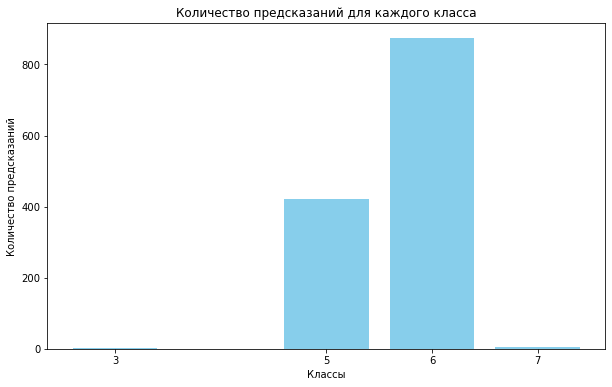

In [106]:
classes = np.unique(y_pred_wine_LogisticRegression)
class_counts = [np.sum(y_pred_wine_LogisticRegression == cls) for cls in classes]

plt.figure(figsize=(10, 6))
plt.bar(classes, class_counts, color='skyblue')
plt.xlabel('Классы')
plt.ylabel('Количество предсказаний')
plt.title('Количество предсказаний для каждого класса')
plt.xticks(classes)
plt.show()

In [107]:
y_pred_heart_LogisticRegression

array([0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 3, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 3, 0, 0, 2, 3, 0,
       0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 3])

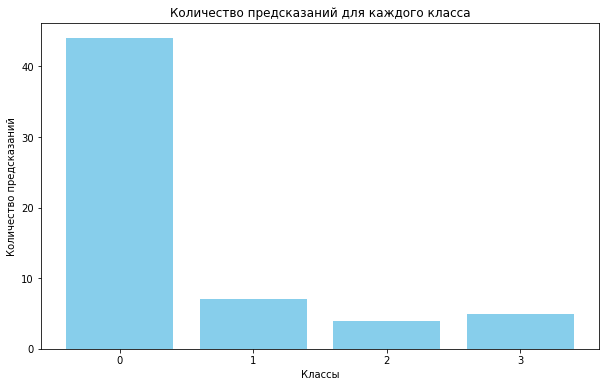

In [108]:
classes = np.unique(y_pred_heart_LogisticRegression)
class_counts = [np.sum(y_pred_heart_LogisticRegression == cls) for cls in classes]

plt.figure(figsize=(10, 6))
plt.bar(classes, class_counts, color='skyblue')
plt.xlabel('Классы')
plt.ylabel('Количество предсказаний')
plt.title('Количество предсказаний для каждого класса')
plt.xticks(classes)
plt.show()

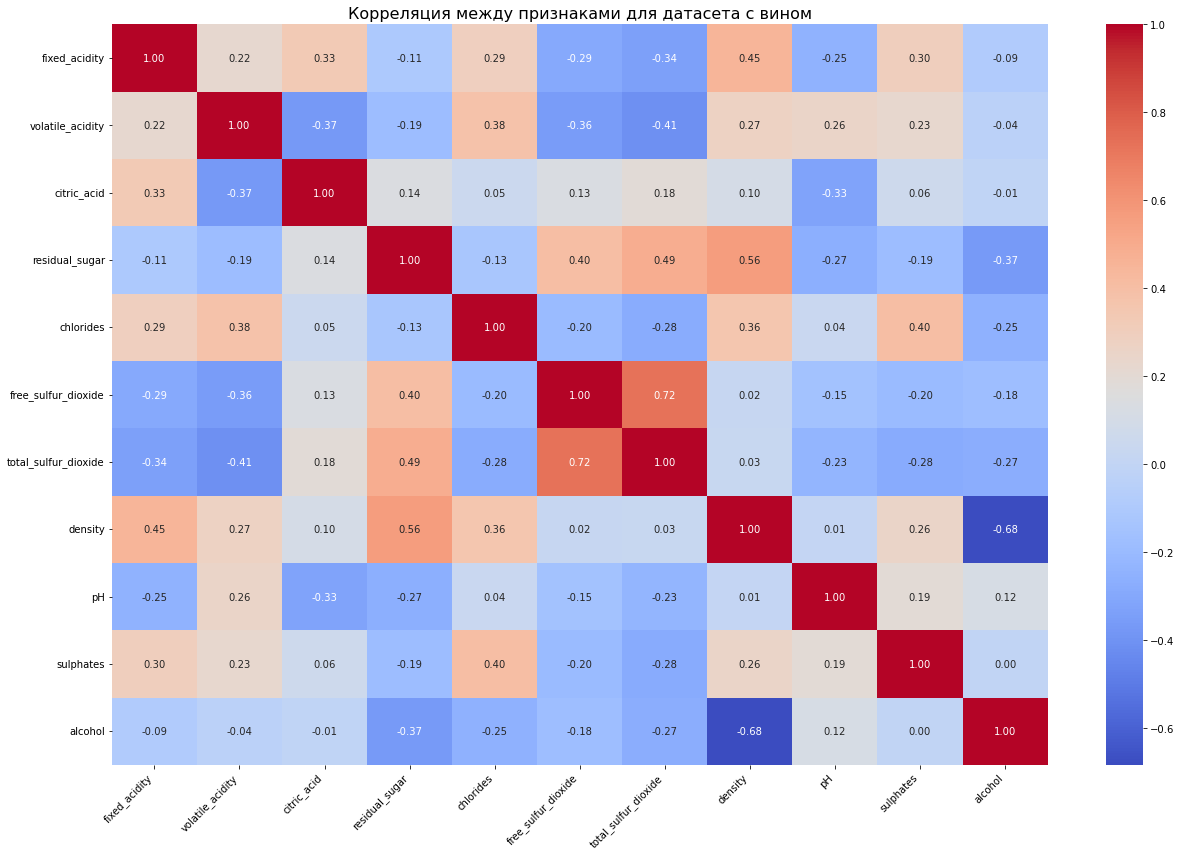

In [109]:
plt.figure(figsize = (18, 12))
sns.heatmap(
    X_wine_train.corr(),
    annot = True,
    fmt = ".2f",
    cmap = "coolwarm",
    cbar = True,
    xticklabels = X_wine_train.columns,
    yticklabels = X_wine_train.columns
)
plt.title("Корреляция между признаками для датасета с вином", fontsize = 16)
plt.xticks(rotation = 45, ha = "right", fontsize = 10)
plt.yticks(fontsize = 10)
plt.tight_layout()
plt.show()

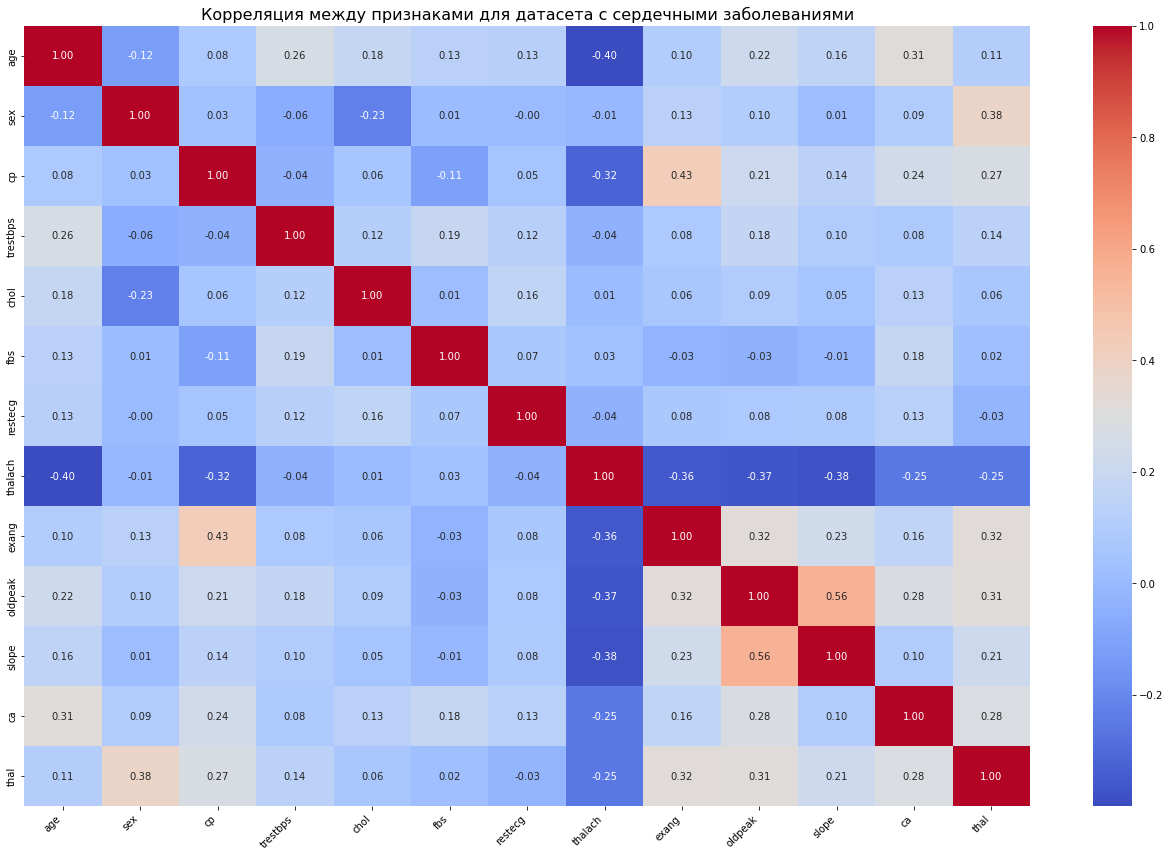

In [110]:
plt.figure(figsize = (18, 12))
sns.heatmap(
    X_heart_train.corr(),
    annot = True,
    fmt = ".2f",
    cmap = "coolwarm",
    cbar = True,
    xticklabels = X_heart_train.columns,
    yticklabels = X_heart_train.columns
)
plt.title("Корреляция между признаками для датасета с сердечными заболеваниями", fontsize = 16)
plt.xticks(rotation = 45, ha = "right", fontsize = 10)
plt.yticks(fontsize = 10)
plt.tight_layout()
plt.show()

Оцениваем время работы модели

In [111]:
import time

In [112]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [113]:
start_time = time.time()
model.fit(X_wine_train, y_wine_train)
training_time = time.time() - start_time

In [114]:
start_time = time.time()
y_pred = model.predict(X_wine_test)
prediction_time = time.time() - start_time

In [115]:
accuracy = accuracy_score(y_wine_test, y_pred)

In [116]:
print(f"Время обучения модели: {training_time:.4f} секунд")
print(f"Время предсказания: {prediction_time:.4f} секунд")
print(f"Точность модели: {accuracy:.4f}")

Время обучения модели: 1.4037 секунд
Время предсказания: 0.0292 секунд
Точность модели: 0.6700


Оценка объема модели

In [117]:
import joblib
import os
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [118]:
X_full = X_wine
y = y_wine

In [119]:
model_full = LogisticRegression()
model_full.fit(X_full, y)
joblib.dump(model_full, 'model_full.pkl')
size_full = os.path.getsize('model_full.pkl')

In [120]:
pca = PCA(n_components=0.5)
X_reduced = pca.fit_transform(X_full)

In [121]:
model_reduced = LogisticRegression()
model_reduced.fit(X_reduced, y)
joblib.dump(model_reduced, 'model_reduced.pkl')
size_reduced = os.path.getsize('model_reduced.pkl')

In [122]:
# Сравнение объемов
print(f"Объем модели с полными данными: {size_full / 1024:.2f} KB")
print(f"Объем модели с уменьшенной размерностью: {size_reduced / 1024:.2f} KB")

Объем модели с полными данными: 2.03 KB
Объем модели с уменьшенной размерностью: 1.00 KB
